In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from python import base


DATA_DIR = base.BASE_DIR / 'data/K팝 음반 이외 주요 상품 매출 추이'
FIGURES_DIR = base.BASE_DIR / 'figures/K팝 음반 이외 주요 상품 매출 추이'


df = pd.read_csv(DATA_DIR / 'data.csv')

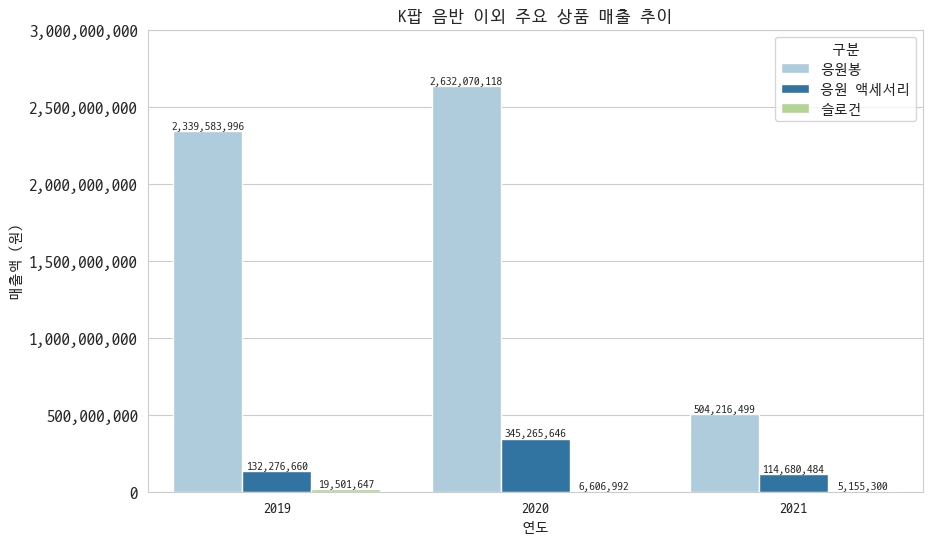

In [2]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='연도', y='상품매출액', hue='구분')

plt.title('K팝 음반 이외 주요 상품 매출 추이')
plt.ylabel('매출액 (원)')
plt.ylim(0, 3e9)
plt.yticks(**base.formatted_ticks_kwargs(plt.yticks()[0]), fontsize=12)
plt.bar_label(plt.gca().containers[0], fmt=base.formatter, label_type='edge', fontsize=8)
plt.bar_label(plt.gca().containers[1], fmt=base.formatter, label_type='edge', fontsize=8)
plt.bar_label(plt.gca().containers[2], fmt=base.formatter, label_type='edge', fontsize=8)
plt.savefig(str(FIGURES_DIR / 'barplot'))
plt.show()

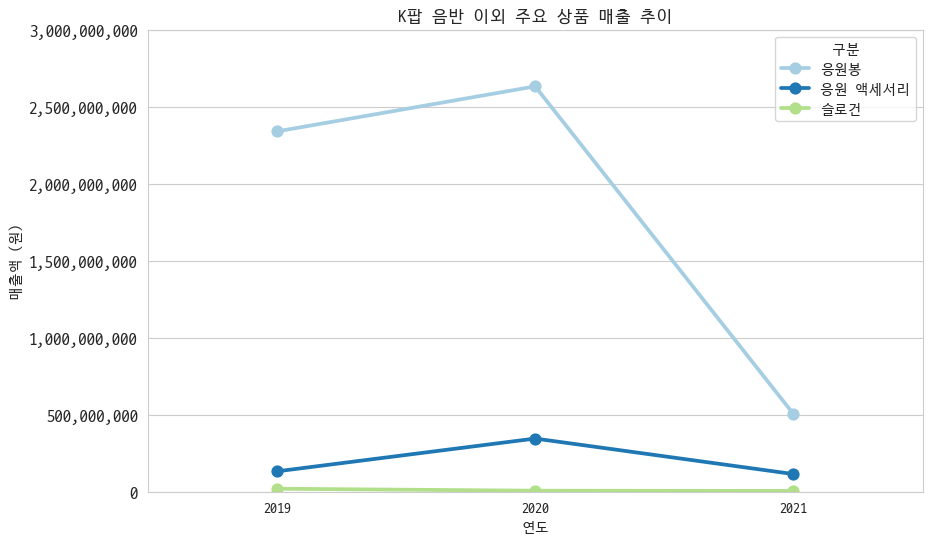

In [3]:
plt.figure(figsize=(10, 6))

sns.pointplot(data=df, x='연도', y='상품매출액', hue='구분', )

plt.title('K팝 음반 이외 주요 상품 매출 추이')
plt.ylabel('매출액 (원)')
plt.ylim(0, 3e9)
plt.yticks(**base.formatted_ticks_kwargs(plt.yticks()[0]), fontsize=12)
plt.savefig(str(FIGURES_DIR / 'pointplot'))
plt.show()

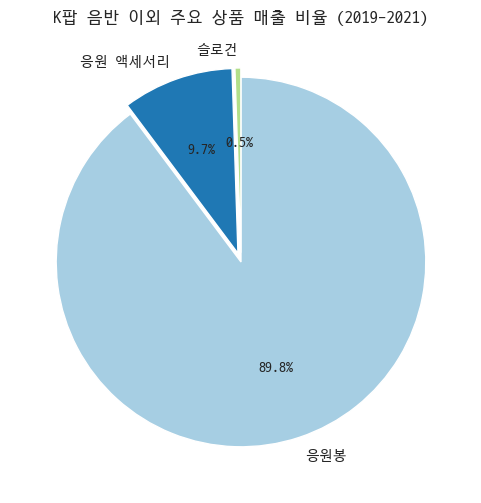

In [4]:
agg_df = df.groupby(['구분']).sum().reset_index().sort_values('상품매출액', ascending=False)

plt.figure(figsize=(6, 6))
plt.title('K팝 음반 이외 주요 상품 매출 비율 (2019-2021)')
plt.pie(agg_df['상품매출액'], labels=agg_df['구분'], explode=[0, 0.05, 0.05], autopct='%.1f%%', startangle=90, counterclock=False)
plt.savefig(str(FIGURES_DIR / 'pie'))
plt.show()